# 5-1 卷積神經網路 CNN

### 程式 5.1 初始化一個小型卷積神經網路 (convnet)

In [0]:
from keras import layers  # 從 keras 套件匯入 layers, models 套件
from keras import models

model = models.Sequential() 
		     #過濾器數量 ↓      ↓過濾器長寬
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 加入 Covn2d 層
model.add(layers.MaxPooling2D((2, 2))) # 進行 MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### 程式 5.2 在卷積神經網路上加入分類器

In [0]:
model.add(layers.Flatten())  # 將 3D 張量展開攤平為 1D, 其 shape = (576, )
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### 程式 5.3 用 MNIST 影像訓練卷積神經網路

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 1s 0us/step


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 17s 280us/step - loss: 0.1793 - acc: 0.9432
Epoch 2/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.0466 - acc: 0.9859
Epoch 3/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.0315 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0234 - acc: 0.9929
Epoch 5/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0200 - acc: 0.9941


### 用測試資料來評估 model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 1s 85us/step


0.9912

# 5-2 以少量資料集從頭訓練一個卷積神經網路

### 程式 5.4 複製圖片到訓練、驗證和測試集目錄

In [0]:
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

### 我們計算每個訓練/驗證/測試分組中的圖片數量，做為資料完整性的檢查：

In [24]:
print('訓練用的貓照片張數:', len(os.listdir(train_cats_dir)))
print('訓練用的狗照片張數:', len(os.listdir(train_dogs_dir)))
print('驗證用的貓照片張數:', len(os.listdir(validation_cats_dir)))
print('驗證用的狗照片張數:', len(os.listdir(validation_dogs_dir)))

訓練用的貓照片張數: 1000
訓練用的狗照片張數: 1000
驗證用的貓照片張數: 500
驗證用的狗照片張數: 500


### 程式 5.5 為狗 vs. 貓分類實作的一個小型的卷積神經網路

In [25]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()  # 查看模型摘要

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### 程式 5.6 配置 model 以進行訓練

In [0]:
from tensorflow.keras.optimizers import RMSprop

model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

### 程式 5.7 使用 ImageDataGenerator 產生器從目錄中讀取影像

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #設定訓練、測試資料的 Python 產生器，並將圖片像素值依 1/255 比例重新壓縮到 [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,              # 目標目錄
    target_size=(150, 150),  # 調整所有影像大小成 150x150
    batch_size=20,
    class_mode='binary')    # 因為使用二元交叉熵 binary_crossentropy 作為損失值，所以需要二位元標籤


validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 看看產生器的輸出結果

In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### 程式 5.8 調整 model 以使用批次量產生器

In [29]:
history = model1.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6912 - acc: 0.5410 - val_loss: 0.6716 - val_acc: 0.5840
Epoch 2/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6641 - acc: 0.5935 - val_loss: 0.6462 - val_acc: 0.6210
Epoch 3/30
100/100 [==============================] - 10s 103ms/step - loss: 0.6317 - acc: 0.6450 - val_loss: 0.6164 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5811 - acc: 0.6865 - val_loss: 0.5759 - val_acc: 0.6950
Epoch 5/30
100/100 [==============================] - 10s 105ms/step - loss: 0.5476 - acc: 0.7135 - val_loss: 0.5685 - val_acc: 0.7040
Epoch 6/30
100/100 [==============================] - 11s 105ms/step - loss: 0.5191 - acc: 0.7395 - val_loss: 0.5540 - val_acc: 0.7110
Epoch 7/30
100/100 [==============================] - 11s 105ms/step - loss: 0.4907 - acc: 0.7550 - val_loss: 0.5825 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 1

### 程式 5.9 儲存model

In [0]:
model1.save('cats_and_dogs_small_1.h5')

### 程式 5.10 顯示訓練和驗證週期的損失值和準確度曲線

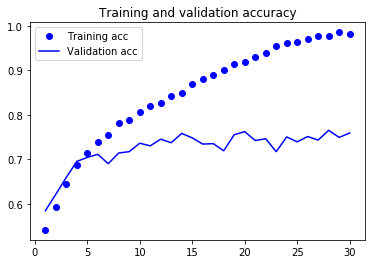

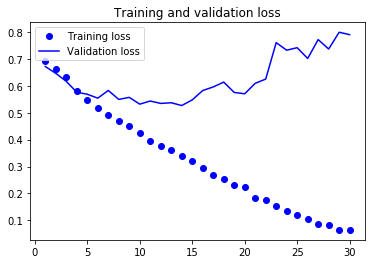

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 程式 5.11 透過 ImageDataGenerator 設定資料擴增

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

### 程式 5.12 顯示一些隨機擴充的訓練影像

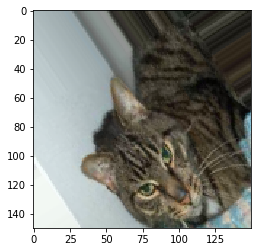

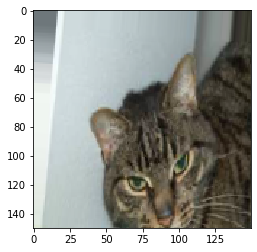

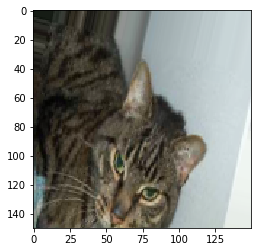

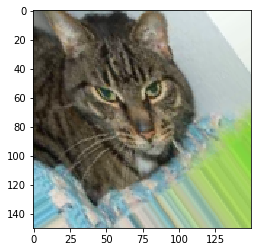

In [33]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1, ) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### 程式 5.13 定義具有 Dropout 層的新卷積神經網路

In [34]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  #  在這裡加入 Dropout 層 (丟棄 50 %)
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()  # 查看模型摘要

model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### 程式 5.14 使用資料擴增產生器來訓練卷積神經網路

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255) # 請注意！驗證資料不應該擴充!!!

train_generator = train_datagen.flow_from_directory(
	train_dir,    # 目標目錄
	target_size=(150, 150), # 所有圖像大小調整成 150×150 
	batch_size=32,
	class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失，所以需要二元標籤


validation_generator = test_datagen.flow_from_directory(
	validation_dir,
	target_size=(150, 150),
	batch_size=32,
	class_mode='binary')

# 訓練
history = model2.fit_generator(   
	train_generator,
	steps_per_epoch=100,
	epochs=100,
	validation_data=validation_generator,
	validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 34s 341ms/step - loss: 0.6943 - acc: 0.5095 - val_loss: 0.6827 - val_acc: 0.5730
Epoch 2/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6872 - acc: 0.5449 - val_loss: 0.6617 - val_acc: 0.6307
Epoch 3/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6737 - acc: 0.5849 - val_loss: 0.6438 - val_acc: 0.6415
Epoch 4/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6595 - acc: 0.6043 - val_loss: 0.6111 - val_acc: 0.6815
Epoch 5/100
100/100 [==============================] - 29s 287ms/step - loss: 0.6446 - acc: 0.6285 - val_loss: 0.5997 - val_acc: 0.6821
Epoch 6/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6356 - acc: 0.6348 - val_loss: 0.5838 - val_acc: 0.7018
Epoch 7/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6166 - acc: 0.6575 -

### 程式 5.15 儲存 model

In [0]:
model2.save('cats_and_dogs_small_2.h5')

### 再次顯示訓練和驗證週期的損失值和準確度曲線

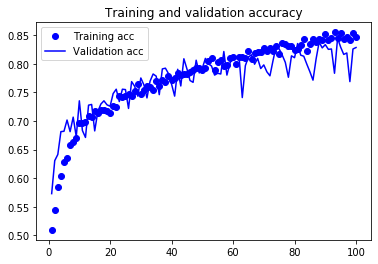

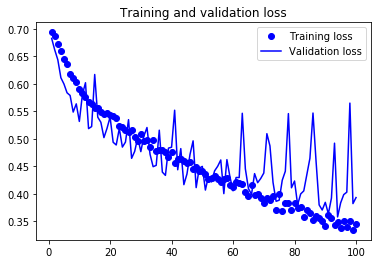

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 5-3 使用預先訓練的卷積神經網路

## 5-3-1 特徵萃取

### 沒有資料擴增的快速特徵萃取

### 程式 5.16 實作 VGG16 convolutional base 卷積基底

In [0]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________

### 程式 5.17 使用預先訓練的 convolutional base 萃取特徵

In [0]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        print(i, end=' ') # 由於萃取需要較長的時間，我們印出 i 來檢視進度
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)


68608000/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

### 程式 5.18 將資料展平

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

### 程式 5.19 定義和訓練密集連接的分類器

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))  # 丟棄法
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, 
                    train_labels,epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 593us/step - loss: 0.6001 - acc: 0.6660 - val_loss: 0.4428 - val_acc: 0.8290
Epoch 2/30
2000/2000 [==============================] - 1s 400us/step - loss: 0.4424 - acc: 0.8010 - val_loss: 0.3691 - val_acc: 0.8520
Epoch 3/30
2000/2000 [==============================] - 1s 405us/step - loss: 0.3582 - acc: 0.8525 - val_loss: 0.3317 - val_acc: 0.8650
Epoch 4/30
2000/2000 [==============================] - 1s 393us/step - loss: 0.3168 - acc: 0.8700 - val_loss: 0.3118 - val_acc: 0.8730
Epoch 5/30
2000/2000 [==============================] - 1s 397us/step - loss: 0.2855 - acc: 0.8825 - val_loss: 0.2984 - val_acc: 0.8770
Epoch 6/30
2000/2000 [==============================] - 1s

### 程式 5.20 繪製結果

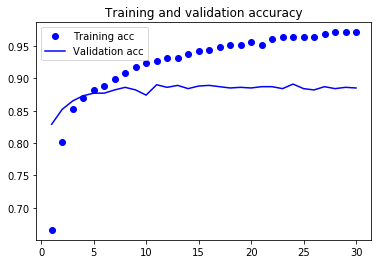

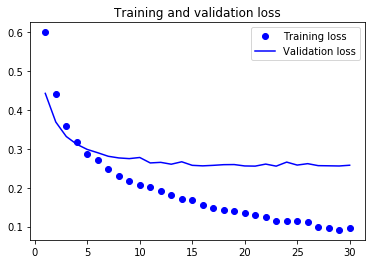

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 資料擴增的特徵萃取

### 程式 5.21 在 convolutional base 卷積基底上增加密集層分類器

In [13]:
from keras import models
from keras import layers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',   # 卷積基底
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)        # 將卷積基底視為層加入 Sequential 模型中
model.add(layers.Flatten()) # 攤平
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) # 增加密集層分類器
model.summary() # 查看模型摘要

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### 程式 5.22 凍結卷積基底神經網路

In [14]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False  

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


### 程式 5.23 以凍結的 convolutional base 卷積基底進行從頭到尾完整的 model 訓練

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications.imagenet_utils import preprocess_input

train_datagen = ImageDataGenerator( # 擴充訓練資料
	#rescale=1./255,
	preprocessing_function=preprocess_input,
	rotation_range=40,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True,
	fill_mode='nearest')

#test_datagen = ImageDataGenerator(rescale=1./255) # 請注意驗證資料不應該擴充
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
	train_dir, # 目標目錄路徑
	target_size=(150, 150), # 調整所有圖像大小成 150×150 
	batch_size=20,
	class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失分數，所						以需要二元標籤

validation_generator = test_datagen.flow_from_directory(
	validation_dir,
	target_size=(150, 150),
	batch_size=20,
	class_mode='binary')

model.compile( loss='binary_crossentropy',
			 optimizer=optimizers.RMSprop(lr=2e-5),
			 metrics=['acc'])

history = model.fit_generator(
	train_generator,
	steps_per_epoch=100,
	epochs=30,
	validation_data=validation_generator,
	validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 27s 273ms/step - loss: 2.0918 - acc: 0.7455 - val_loss: 0.7735 - val_acc: 0.9010
Epoch 2/30
100/100 [==============================] - 25s 253ms/step - loss: 1.0897 - acc: 0.8620 - val_loss: 0.4917 - val_acc: 0.9410
Epoch 3/30
100/100 [==============================] - 26s 255ms/step - loss: 0.6465 - acc: 0.9040 - val_loss: 0.4983 - val_acc: 0.9370
Epoch 4/30
100/100 [==============================] - 26s 258ms/step - loss: 0.6452 - acc: 0.9065 - val_loss: 0.4119 - val_acc: 0.9510
Epoch 5/30
100/100 [==============================] - 26s 257ms/step - loss: 0.6630 - acc: 0.9110 - val_loss: 0.4186 - val_acc: 0.9490
Epoch 6/30
100/100 [==============================] - 26s 260ms/step - loss: 0.4471 - acc: 0.9315 - val_loss: 0.4427 - val_acc: 0.9450
Epoch 7/30
100/100 [==============================] - 25s 255ms/step - loss: 0.5076 - acc: 0.9295 - val_lo

In [0]:
""" 若你的 Keras 版本執行程式 5.23 後的結果與書上有所差異，請將程式 5.23 做以下的修改

這邊提供 2 種修改方式：

方式 1. 將 conv_base.trainable = False  註解掉。

方式 2. 餵給 VGG16 的圖片像素值不要壓到 0-1 之間，將 rescale=1./255 都註解掉，在程式 5.23 中做以下的修改：

from keras.applications.imagenet_utils import preprocess_input  # 新增這行

train_gen = ImageDataGenerator(
#     rescale=1.0/255,                       # 註解這行
    preprocessing_function=preprocess_input, # 新增這行
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='nearest'
)
#test_datagen = ImageDataGenerator(1./255)                                 # 註解這行
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # 新增這行

"""

#### 繪製結果

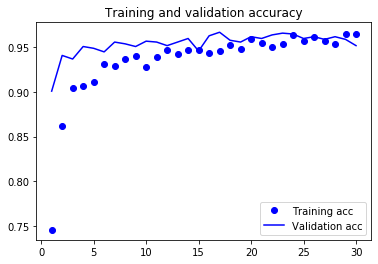

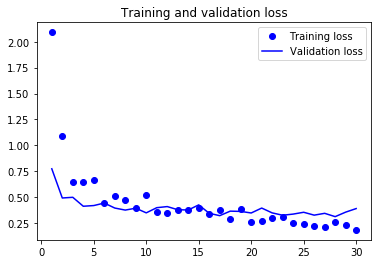

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 5-3-2 微調

### 程式 5.24 將所有層凍結到指定層為止

In [17]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.summary()

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### 程式 5.25 微調神經網路

In [18]:
# 編譯模型
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

# 訓練模型
history = model.fit_generator(   
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 28s 279ms/step - loss: 0.1862 - acc: 0.9690 - val_loss: 0.3127 - val_acc: 0.9610
Epoch 2/100
100/100 [==============================] - 25s 251ms/step - loss: 0.2194 - acc: 0.9640 - val_loss: 0.3250 - val_acc: 0.9640
Epoch 3/100
100/100 [==============================] - 26s 256ms/step - loss: 0.2297 - acc: 0.9645 - val_loss: 0.3043 - val_acc: 0.9610
Epoch 4/100
100/100 [==============================] - 25s 255ms/step - loss: 0.1635 - acc: 0.9700 - val_loss: 0.3163 - val_acc: 0.9620
Epoch 5/100
100/100 [==============================] - 25s 252ms/step - loss: 0.2199 - acc: 0.9670 - val_loss: 0.3246 - val_acc: 0.9600
Epoch 6/100
100/100 [==============================] - 25s 253ms/step - loss: 0.2286 - acc: 0.9615 - val_loss: 0.3335 - val_acc: 0.9610
Epoch 7/100
100/100 [==============================] - 25s 252ms/step - loss: 0.1782 - acc: 0.9710 - val_loss: 0.2964 - val_acc: 0.9640
Epoch 8/100
100/100 [===========================

#### 繪製結果

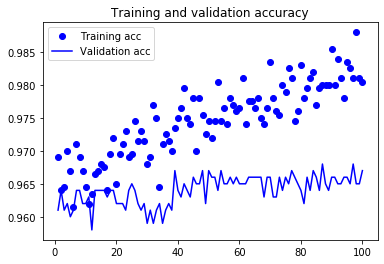

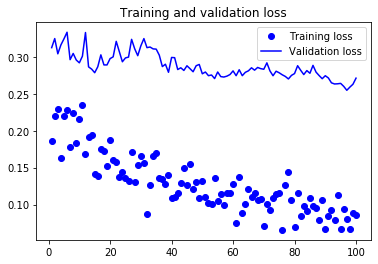

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 程式 5.26 繪製平滑曲線

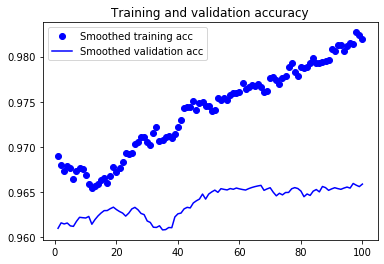

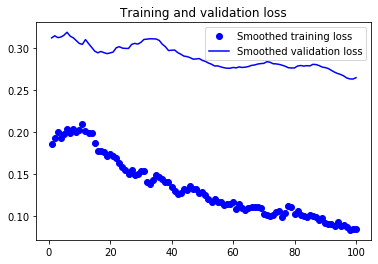

In [20]:
def smooth_curve(points, factor=0.8):
	smoothed_points = []
	for point in points:
		if smoothed_points:
			previous = smoothed_points[-1]
			smoothed_points.append(previous * factor + point * (1 - factor))
		else:
			smoothed_points.append(point)
	return smoothed_points

plt.plot( epochs,
	   smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot( epochs,
	   smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot( epochs,
	   smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot( epochs,
	   smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### 程式 5.27 使用測試資料來評估微調後的 model

In [21]:
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9669999933242798


# 5-4 視覺化呈現卷積神經網路學習的內容

### 5-4-1 中間層輸出的視覺化

### 程式 5.28 載入 5-2 節程式 5.15 中已建立並儲存的 model

In [42]:
from tensorflow.keras.models import load_model

model = load_model(r'cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### 程式 5.29 預處理 (preprocessing) 單張圖片

In [43]:
img_path = r'cat.9999.jpg'

from keras.preprocessing import image
import numpy as np

# 將這張圖片預處理成 4D 張量並將像素值限制在 0-1 之間
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape) # shape = (1, 150, 150, 3)

(1, 150, 150, 3)


### 程式 5.30 顯示測試影像

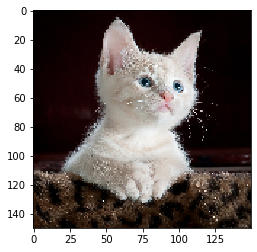

In [44]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()


### 程式 5.31 用一個輸入張量和一個輸出張量 list (8個層) 來建構一個model

In [46]:
from tensorflow.keras import models 

layer_outputs = [layer.output for layer in model.layers[:8]]
for op in layer_outputs: 
    print(op)

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Tensor("conv2d_4_2/Relu:0", shape=(?, 148, 148, 32), dtype=float32)
Tensor("max_pooling2d_4_2/MaxPool:0", shape=(?, 74, 74, 32), dtype=float32)
Tensor("conv2d_5_2/Relu:0", shape=(?, 72, 72, 64), dtype=float32)
Tensor("max_pooling2d_5_2/MaxPool:0", shape=(?, 36, 36, 64), dtype=float32)
Tensor("conv2d_6_2/Relu:0", shape=(?, 34, 34, 128), dtype=float32)
Tensor("max_pooling2d_6_2/MaxPool:0", shape=(?, 17, 17, 128), dtype=float32)
Tensor("conv2d_7_2/Relu:0", shape=(?, 15, 15, 128), dtype=float32)
Tensor("max_pooling2d_7_2/MaxPool:0", shape=(?, 7, 7, 128), dtype=float32)


### 程式 5.32 在 predict mode 下執行 model

In [47]:
activations = activation_model.predict(img_tensor)
print(len(activations))

first_layer_activation = activations[0]
print(first_layer_activation.shape)

8
(1, 148, 148, 32)


### 程式 5.33 視覺化 (繪製) 第 4 個 channel 的特徵圖

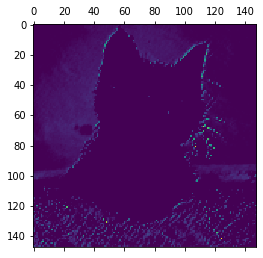

In [48]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

### 程式 5.34 視覺化 (繪製) 第 7 個 channel

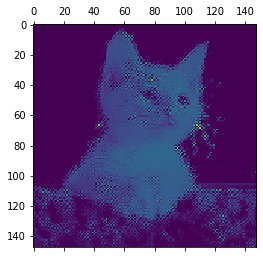

In [49]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

### 程式 5.35 視覺化 (繪製) 每個啟動函數輸出中每個 channel 的特徵圖

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


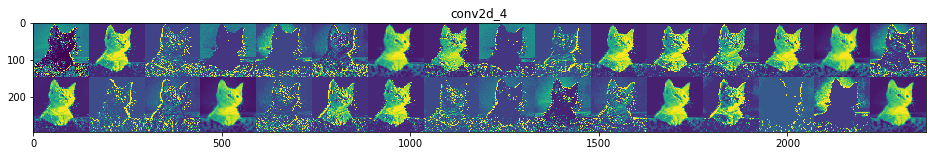

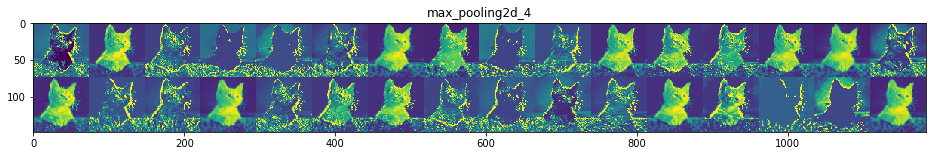

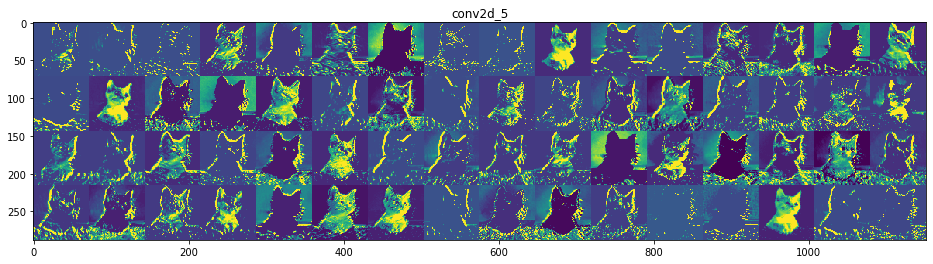

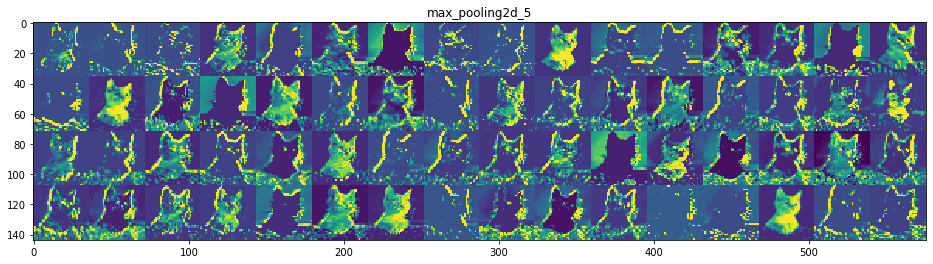

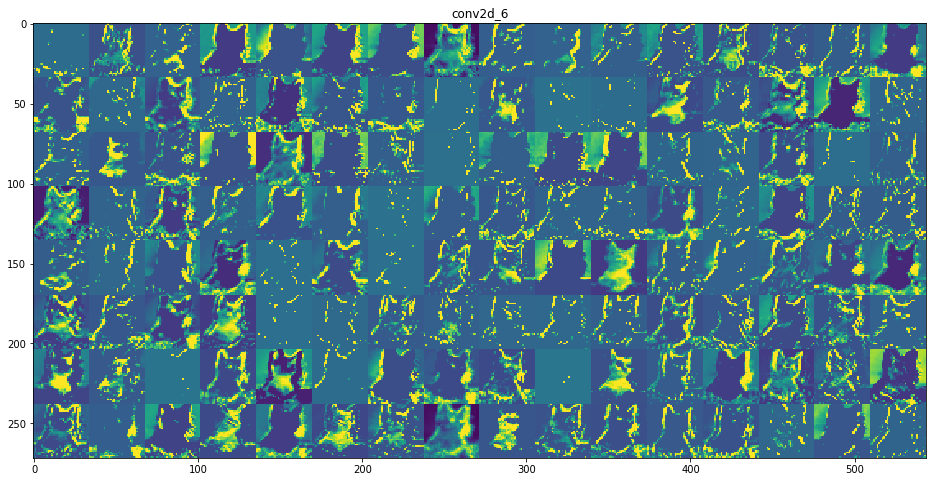

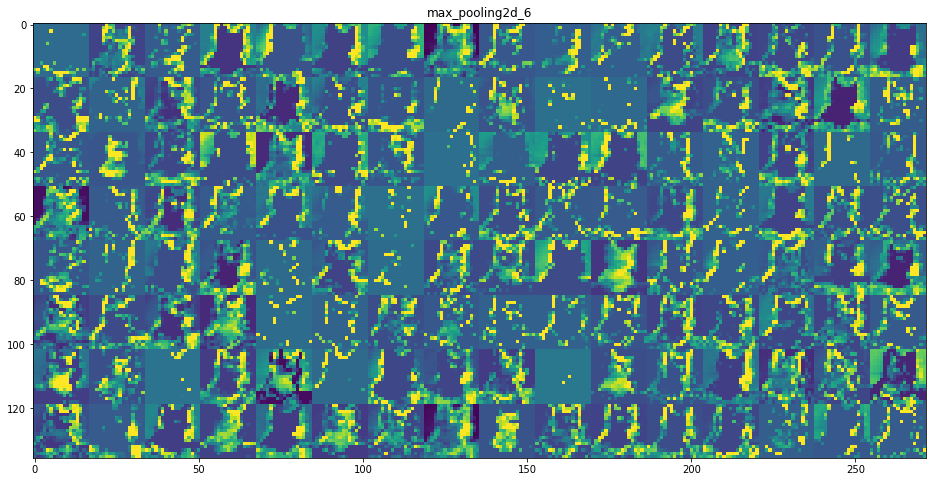

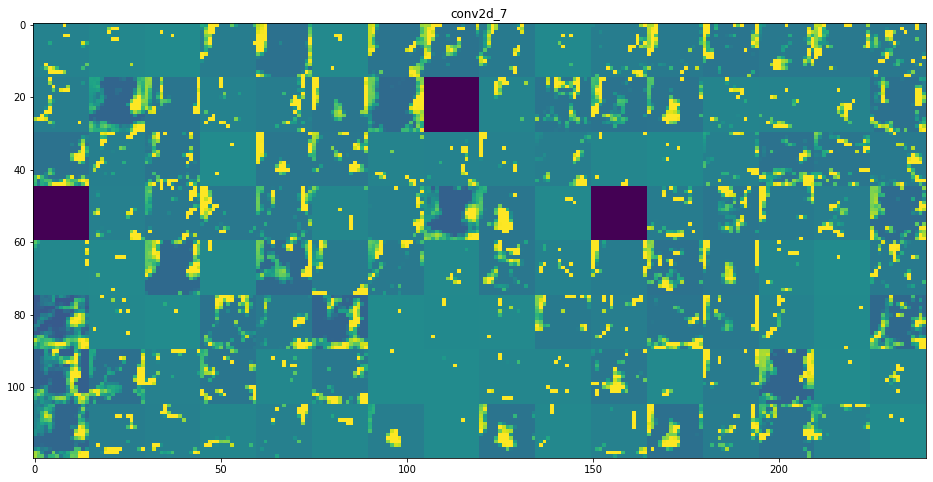

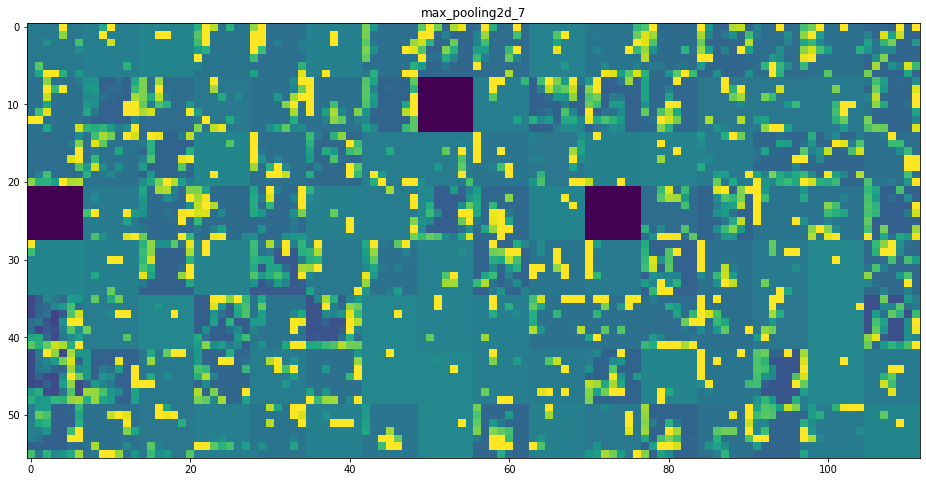

In [50]:
layer_names = []

# 取得各層的名字，這樣才可以成為圖表的一部分
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### 5-4-2 視覺化 convnet 的 filter

### 程式 5.36 建立 (定義) 過濾器視覺化的損失函數張量

In [0]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output 
loss = K.mean(layer_output[:, :, :, filter_index]) # 定義損失函數張量, 其為層輸出張量數值取平均



### 程式 5.37 取得損失值 (loss) 相對於輸入 (model.input) 的梯度

In [0]:
# gradients() 會傳回一個由張量組成的list, 在本例中, list 的大小為 1, 因此, 只取出其第 0 個元素, 即 grads 是 1 個梯度張量
grads = K.gradients(loss, model.input)[0] 

### 程式 5.38 梯度正規化技巧

In [0]:
# 在做除法之前先加上 1e-5 以避免意外地除以 0
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

### 程式 5.39 建立給定輸入張量, 取得輸出張量的 Keras function

In [0]:
iterate = K.function([model.input], [loss, grads]) # 定義一個 Keras 後端函式

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
#輸出損失張量與梯度張量				↑將此做為輸入張量

### 程式 5.40 透過隨機梯度上升實作損失最大化

In [0]:
# 從帶有雜訊的灰階圖像開始
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128. # 1...

step = 1. # 每個梯度更新的大小
for i in range(40): # 執行梯度上升 40 步
	loss_value, grads_value = iterate([input_img_data]) # 計算損失值和梯度值
	input_img_data += grads_value * step # 2. 以朝向最大化損失調整輸入圖像 (以前SGD 是用 -= 算符, 現在反過來是用 += 算符)


### 程式 5.41 建立將圖像張量轉換為可用的影像格式的自訂函式

In [0]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)				# 1. 張量正規化：以 0 為中心, 確保 std 為 0.1 
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1) # 修正成 [0, 1], 即 0-1 之間 
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')		# 2.轉換成 RGB 陣列
    return x


### 程式 5.42 建立視覺化過濾器的函式

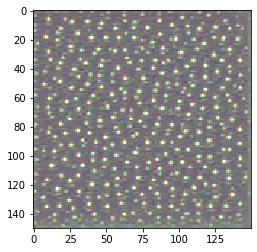

In [57]:
def generate_pattern(layer_name, filter_index, size=150):
	layer_output = model.get_layer(layer_name).output # 取得指定層的輸出張量
	loss = K.mean(layer_output[:, :, :, filter_index]) # 1. 取得指定過濾器的輸出張量, 並以最大化此張量的均值做為損失


	grads = K.gradients(loss, model.input)[0] # 根據此損失計算輸入影像的梯度

	grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # 標準化技巧：梯度標準化

	iterate = K.function([model.input], [loss, grads]) # 2.建立 Keras function 來針對給定的輸入影像回傳損失和梯度

	input_img_data = np.random.random((1, size, size, 3)) * 20 + 128. # 3. 從帶有雜訊的灰階影像開始
	

	step = 1.
	for i in range(40): # 執行梯度上升 40 步
		loss_value, grads_value = iterate([input_img_data]) # 4. 針對給定的輸入影像回傳損失和梯度
		input_img_data += grads_value * step

	img = input_img_data[0]
	return deprocess_image(img)	  # 進行圖像後處理後回傳


plt.imshow(generate_pattern('block3_conv1', 0)) # 我們來看看 block3_conv1 層中的過濾器 0 的特徵圖

### 程式 5.43 產生一層中所有的過濾器響應 pattern

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


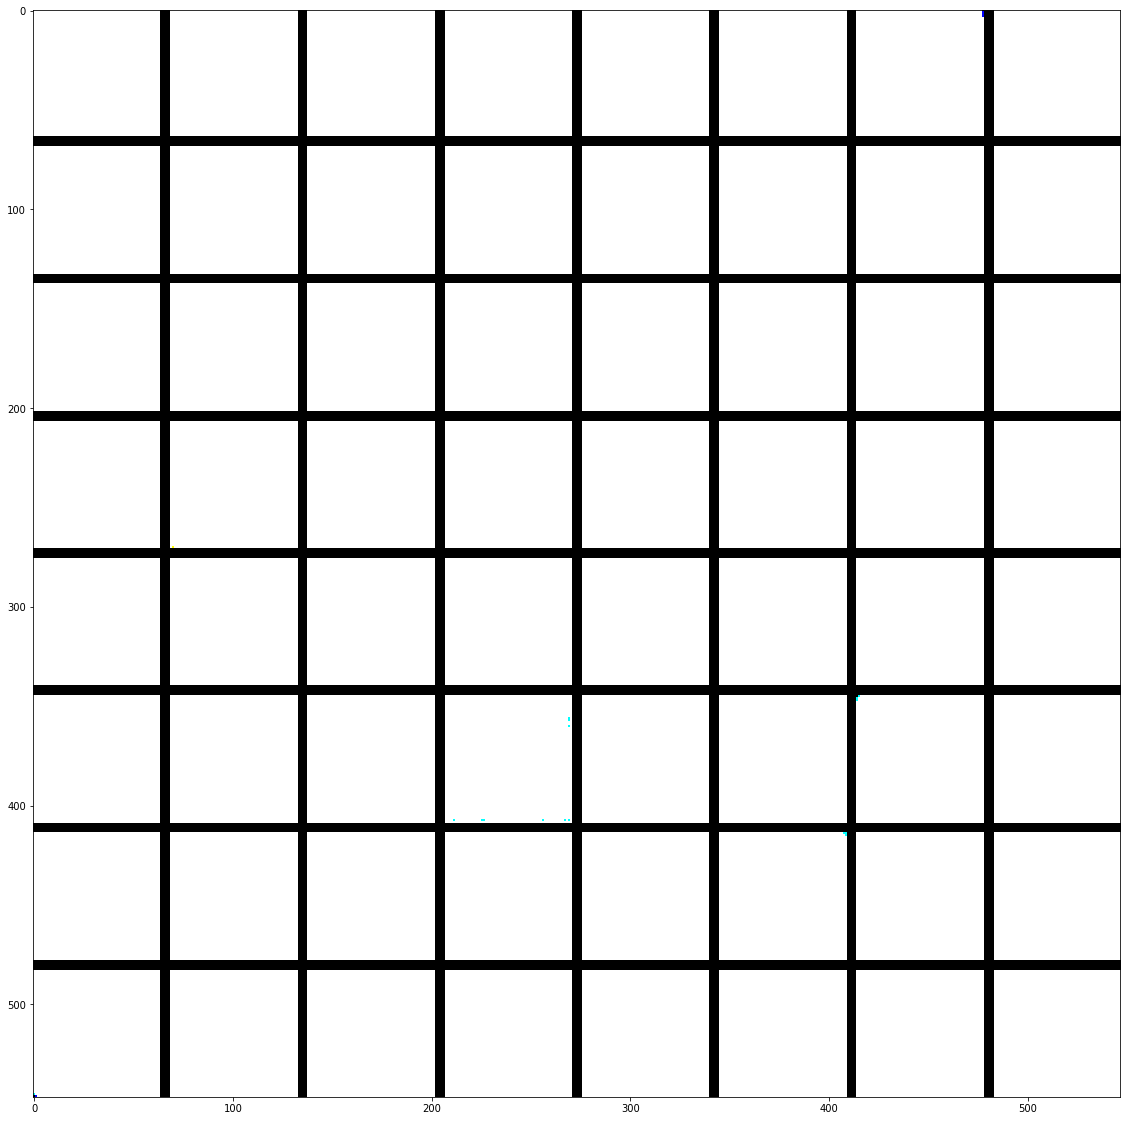

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


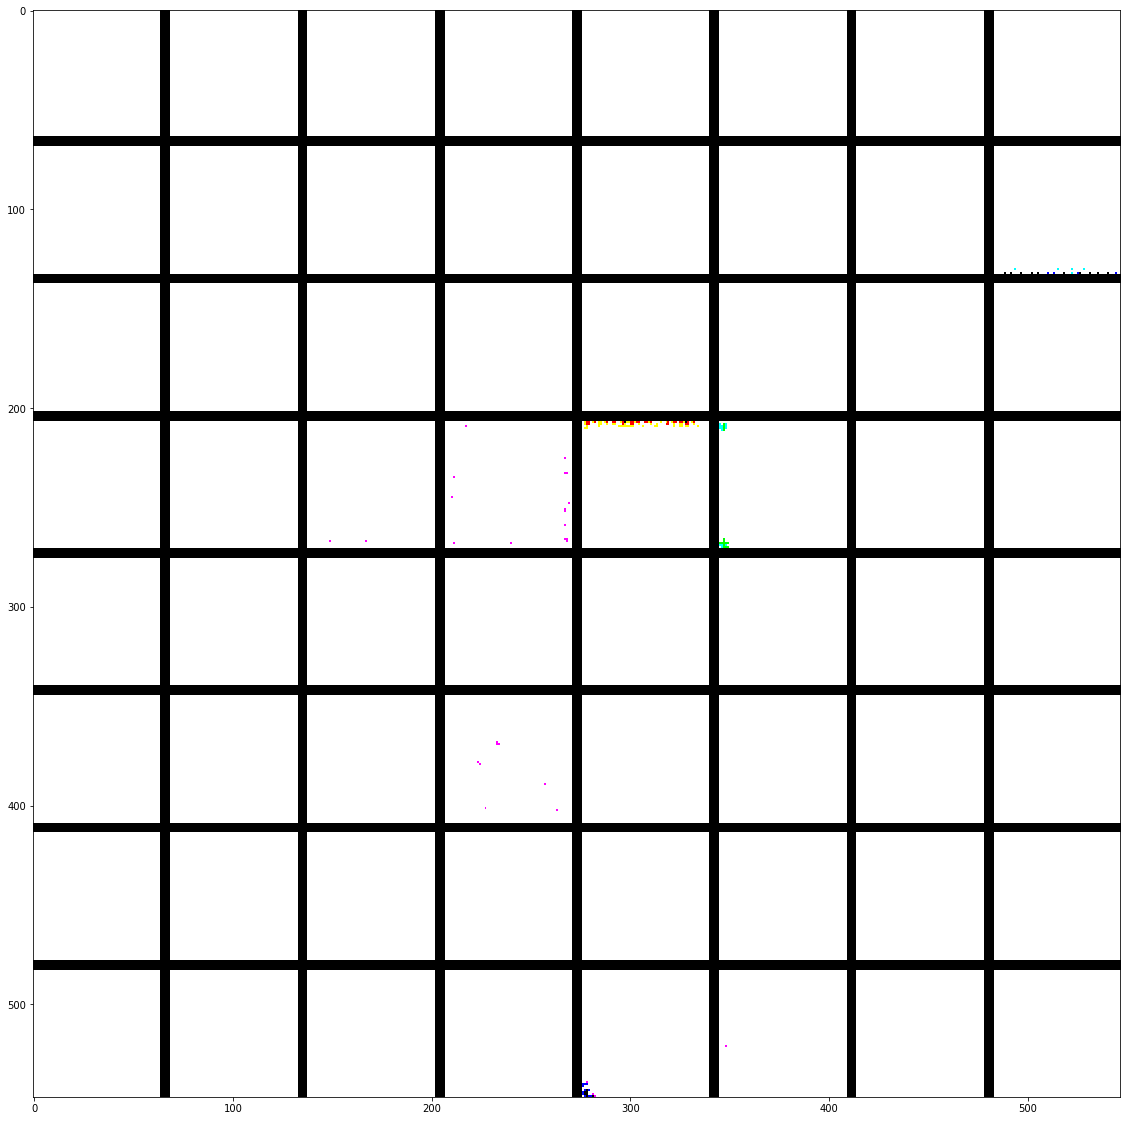

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


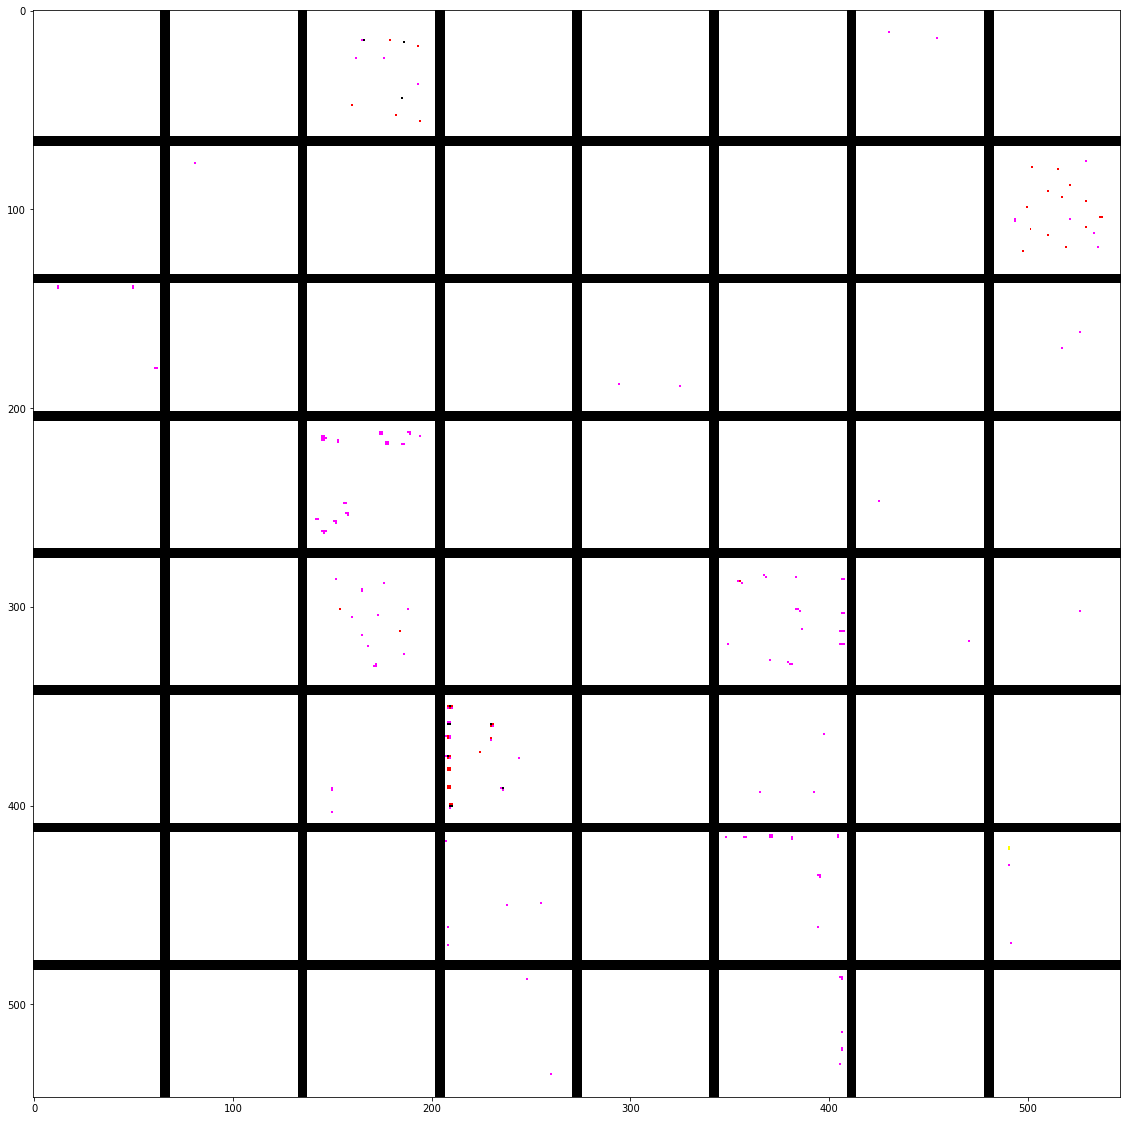

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


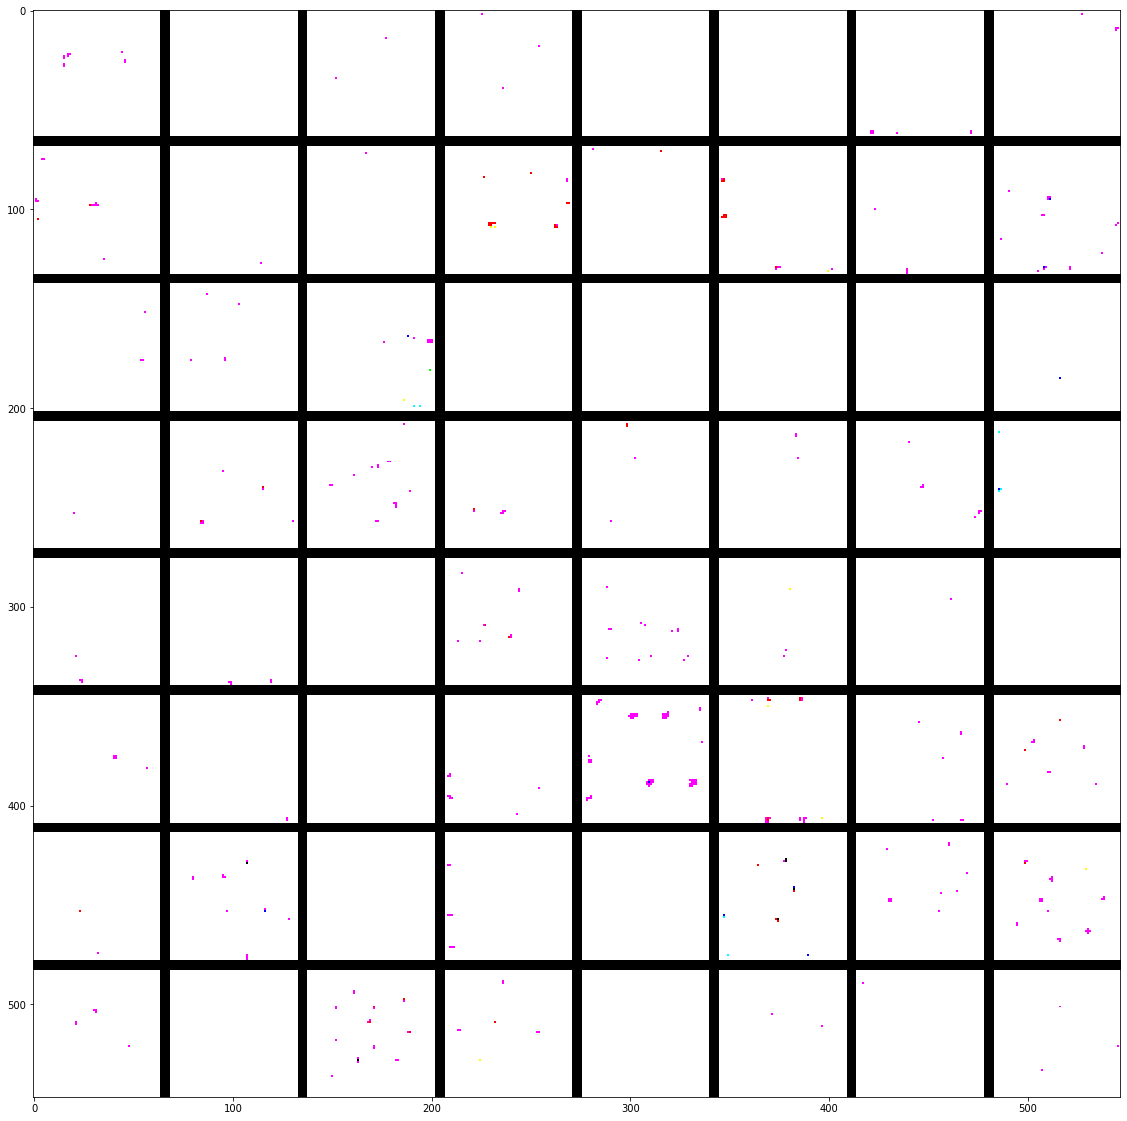

In [58]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # 1. 用於儲存結果的空(黑色)影像
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # ← 迭代產生網格的行
        for j in range(8):  # ←迭代產生網格的列
            # 在 layer_name 中產生過濾器 i +(j * 8) 的 pattern
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # 將結果放在結果網格的方形(i, j)中
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # 顯示網格結果
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

### 5-4-3 視覺化類別激活熱圖 heatmap of class activation

### 程式 5.44 載入預先訓練權重的 VGG16 神經網路

In [59]:
from keras.applications.vgg16 import VGG16
 
model = VGG16(weights='imagenet')  # 請注意, 在頂部包含了密集連接的分類器 (預設 include_top=True)

553467904/553467096 [==============================] - 6s 0us/step


### 程式5.45 預先處理 VGG16 的輸入影像

In [62]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = r'african_elephants.jpg'

img = image.load_img(img_path, target_size=(224, 224))
print(type(img))  # 目前圖片為 <class 'PIL.Image.Image'> 物件
print(img.size)  # 可以用 size 屬性查看尺寸 -> (224, 224)

x = image.img_to_array(img) 	# 將 PIL 物件轉為 float32 的 Numpy 陣列
print(x.shape) 				# shape=(224, 224, 3)


# 將 x 陣列 (可視為張量) 增加一個批次軸, shape=(1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
print(x.shape)

x = preprocess_input(x) # 預處理批次量 (這會對每一 channel 做顏色值正規化)

<class 'PIL.Image.Image'>
(224, 224)
(224, 224, 3)
(1, 224, 224, 3)


### 程式 5.46 使用 VGG 神經網路預測圖片類別

In [63]:
preds = model.predict(x)
print('預測結果:', decode_predictions(preds, top=3)[0])

np.argmax(preds[0])


預測結果: [('n02504458', 'African_elephant', 0.8137697), ('n01871265', 'tusker', 0.14989792), ('n02504013', 'Indian_elephant', 0.031138979)]


386

### 程式 5.47 設定 Gard-CAM 演算法

In [0]:
from keras import backend as K

african_elephant_output = model.output[:, 386] # ← 預測向量中的 "非洲象" 項目

last_conv_layer = model.get_layer('block5_conv3') # block5_conv3 層的輸出特徵圖, 其為 VGG16 中的最後一個卷積層

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0] #  block5_conv3 的輸出特徵圖中關於 "非洲象" 類別的梯度

pooled_grads = K.mean(grads, axis=(0, 1, 2)) #  轉換成向量 shape = (512, ), 其中每個項目是特定特徵圖 channel 的梯度平均強度(值)

#  給定輸入影像的條件下, 讓我們可以存取剛剛定義的數值：pooled_grads 和 block5_conv3 的輸出特徵圖
iterate = K.function([model.input], 
    [pooled_grads, last_conv_layer.output[0]])

#  對於給定的兩隻大象樣本影像, 產生這兩個量值, 以 Numpy 陣列呈現
pooled_grads_value, conv_layer_output_value = iterate([x])

# 將特徵圖陣列中的每個 channel 與 "大象" 類別相關的 "此 channel 的重要程度" 相乘
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 特徵圖的跨 channel 平均值是類別激活函數輸出的熱圖
heatmap = np.mean(conv_layer_output_value, axis=-1)


### 程式 5.48 熱圖後期處理

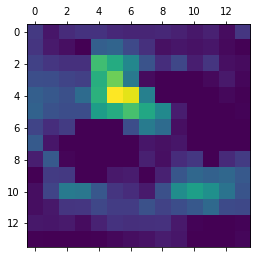

In [65]:
import matplotlib.pyplot as plt
import numpy as np

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

### 程式 5.49 將熱圖與原始影像疊加在一起

In [66]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img # 這裡 0.4 是熱圖強度因子

print('是否儲存成功:', cv2.imwrite('elephant_cam.jpg', superimposed_img))


是否儲存成功: True
